<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Exercice3_Prediction_Conforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Charger les données mcycle du package MASS.
Les données mcycle sont un jeu de données sur les chocs à la tête mesurés lors d'accidents de moto. Elles contiennent deux variables : le temps (en millisecondes) et l'accélération (mesurée en g).

In [1]:
# Charger le package nécessaire
#install.packages("MASS")
library(MASS)

# Charger les données mcycle
data(mcycle)

# Afficher les premières lignes des données
head(mcycle)

,times,accel
,<dbl>,<dbl>
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7
6,6.2,-2.7


# 3. Appliquer une régression polynomiale et l'afficher avec son intervalle de prédiction.

Une régression polynomiale ajuste un polynôme sur les données pour capturer les relations non linéaires. On peut ajuster une régression polynomiale de degré 2 ou plus, et visualiser le modèle avec ses intervalles de prédiction.

Warning message in predict.lm(fit_poly, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


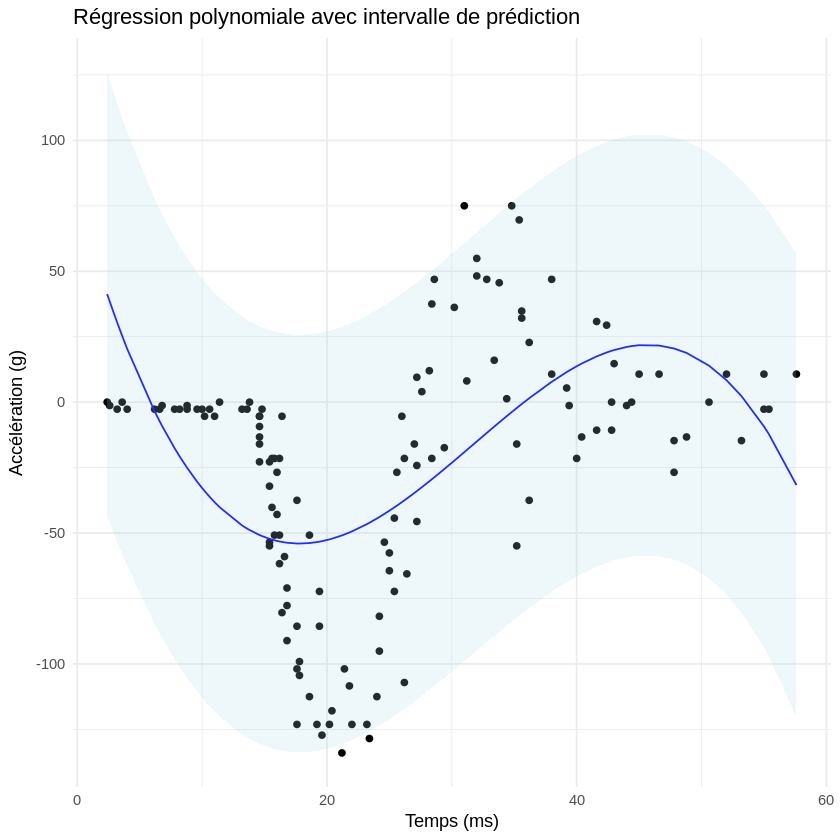

In [7]:
# Appliquer une régression polynomiale de degré 2
fit_poly <- lm(accel ~ poly(times, 3), data = mcycle)

# Prédictions avec intervalle de confiance
predictions <- predict(fit_poly, interval = "prediction")

# Tracer le modèle avec ggplot
library(ggplot2)

ggplot(mcycle, aes(x = times, y = accel)) +
  geom_point() +
  geom_line(aes(y = predictions[, "fit"]), color = "blue") +
  geom_ribbon(aes(ymin = predictions[, "lwr"], ymax = predictions[, "upr"]), alpha = 0.2, fill = "lightblue") +
  labs(title = "Régression polynomiale avec intervalle de prédiction",
       x = "Temps (ms)", y = "Accélération (g)") +
  theme_minimal()


# 4. Appliquer une régression quantile localement polynomiale et comparer avec une régression quantile linéaire.
Pour appliquer une régression quantile localement polynomiale, on utilise la fonction lpqr. Ensuite, on compare cela avec une régression quantile linéaire plus simple.

In [10]:
# Charger le package quantreg si ce n'est pas déjà fait
#install.packages("quantreg")
library(quantreg)

# Régression quantile localement polynomiale pour tau = 0.5 (médiane)
fit_lpqr <- lprq(mcycle$times, mcycle$accel, h = 5, tau = 0.5)

# Régression quantile linéaire classique pour tau = 0.5
fit_rq <- rq(accel ~ times, data = mcycle, tau = 0.5)

# Tracer les deux modèles
ggplot(mcycle, aes(x = times, y = accel)) +
  geom_point() +
  geom_line(aes(x = times, y = fit_lpqr$fv), color = "red", linetype = "dashed") +  # Régression quantile localement polynomiale
  geom_abline(intercept = coef(fit_rq)[1], slope = coef(fit_rq)[2], color = "blue") +  # Régression quantile linéaire
  labs(title = "Régression quantile localement polynomiale vs linéaire (tau = 0.5)",
       x = "Temps (ms)", y = "Accélération (g)") +
  theme_minimal()


ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (133).
✖ Fix the following mappings: `y`.

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mi